In [53]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
#  Machine learning libraies
import sklearn as ski
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

# Buidling models
from sklearn.model_selection import train_test_split
# Prepocessing the data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [9]:
my_data = pd.read_csv("./Data/Medical_insurance_dataset.csv")

In [10]:
# Display my_data
my_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased
...,...,...,...,...,...
395,15691863,Female,46,41000,purchased
396,15706071,Male,51,23000,purchased
397,15654296,Female,50,20000,purchased
398,15755018,Male,36,33000,not-purchased


In [11]:
my_data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [12]:
# Prepocessimg data
# encoding Gender into numbers
l_encode = LabelEncoder()
d_encode = my_data
d_encode.Gender = l_encode.fit_transform(d_encode.Gender)

In [13]:
d_encode

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,not-purchased
1,15810944,1,35,20000,not-purchased
2,15668575,0,26,43000,not-purchased
3,15603246,0,27,57000,not-purchased
4,15804002,1,19,76000,not-purchased
...,...,...,...,...,...
395,15691863,0,46,41000,purchased
396,15706071,1,51,23000,purchased
397,15654296,0,50,20000,purchased
398,15755018,1,36,33000,not-purchased


In [14]:
# Encoding Purchased into numbers
d_encode.Purchased = l_encode.fit_transform(d_encode.Purchased)

In [15]:
# Final Encoded data
d_encode

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


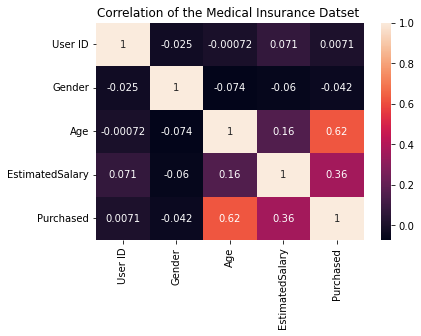

In [19]:
snb.heatmap(my_data.corr(), annot=True)
plt.title("Correlation of the Medical Insurance Datset ")
plt.show()

In [20]:
# Initialising X and y
X= d_encode[["User ID", "Age", "EstimatedSalary", "Purchased"]]
y= d_encode[[ "Gender"]]

In [44]:
# Spliting the data
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size= 0.2, random_state=42)

In [45]:
# Displaying the splitaccuracy_kn ted size
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((320, 4), (80, 4), (320, 1), (80, 1))

In [46]:
# Normalisation
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.fit_transform(X_test)



In [54]:
# Building Models
# initialising the models
decision_model = DecisionTreeClassifier()
random_model= RandomForestClassifier()
kn_model= KNeighborsClassifier()



In [59]:
# fitting the model
decision_model.fit(X_train,y_train)



DecisionTreeClassifier()

In [55]:
kn_model.fit(X_train,y_train)

/home/salim/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [56]:
random_model.fit(X_train,y_train)

/tmp/ipykernel_12777/1257277659.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_model.fit(X_train,y_train)


RandomForestClassifier()

In [60]:
# Predicting
y_predict_decision = decision_model.predict(X_test)
y_predict_random = random_model.predict(X_test)
y_predict_kn = kn_model.predict(X_test)


In [61]:
# Evaluation
decision_accuracy= accuracy_score(y_test,y_predict_decision)
random_accuracy= accuracy_score(y_test,y_predict_random)
kn_accuracy= accuracy_score(y_test,y_predict_kn)


In [62]:
# Output
print("Decision Accuracy:")
print(decision_accuracy)
print("************")
print(" ")
print("Random Accuracy:")
print(random_accuracy)
print("************")
print(" ")
print("Kn Accuracy:")
print(kn_accuracy)
print("************")
print(" ")





Decision Accuracy:
0.4875
************
 
Random Accuracy:
0.4875
************
 
Kn Accuracy:
0.5
************
 
